In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

sns.set()
plt.style.use('ggplot')

In [4]:
import pandas as pd

# Read the dataset from the file
df = pd.read_csv('./breast-cancer-wisconsin.data', header=None)

# Optionally, set column names
df.columns = ["Sample code number", "Clump Thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape", "Marginal Adhesion", "Single Epithelial Cell Size", "Bare Nuclei", "Bland Chromatin", "Normal Nucleoli", "Mitoses", "Class"]

In [5]:
df

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [6]:
# We don't need the "Sample code number" column
df = df.drop("Sample code number", axis=1)

In [7]:
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


## Understanding the dataset

In [8]:
df.shape

(699, 10)

In [9]:
# To get a statistical idea of th edataset

df.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump Thickness              699 non-null    int64 
 1   Uniformity of Cell Size      699 non-null    int64 
 2   Uniformity of Cell Shape     699 non-null    int64 
 3   Marginal Adhesion            699 non-null    int64 
 4   Single Epithelial Cell Size  699 non-null    int64 
 5   Bare Nuclei                  699 non-null    object
 6   Bland Chromatin              699 non-null    int64 
 7   Normal Nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [11]:
# Convert any non-numerical values to 'NaN'
df['Bare Nuclei'] = pd.to_numeric(df['Bare Nuclei'], errors='coerce')
df.isna().sum()

,0
Clump Thickness,0
Uniformity of Cell Size,0
Uniformity of Cell Shape,0
Marginal Adhesion,0
Single Epithelial Cell Size,0
Bare Nuclei,16
Bland Chromatin,0
Normal Nucleoli,0
Mitoses,0
Class,0


In [12]:
# drop the rows with cells with 'NAN' with mean
df.dropna(inplace=True)
df = df.astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 683 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump Thickness              683 non-null    float64
 1   Uniformity of Cell Size      683 non-null    float64
 2   Uniformity of Cell Shape     683 non-null    float64
 3   Marginal Adhesion            683 non-null    float64
 4   Single Epithelial Cell Size  683 non-null    float64
 5   Bare Nuclei                  683 non-null    float64
 6   Bland Chromatin              683 non-null    float64
 7   Normal Nucleoli              683 non-null    float64
 8   Mitoses                      683 non-null    float64
 9   Class                        683 non-null    float64
dtypes: float64(10)
memory usage: 58.7 KB


In [13]:
df.shape

(683, 10)

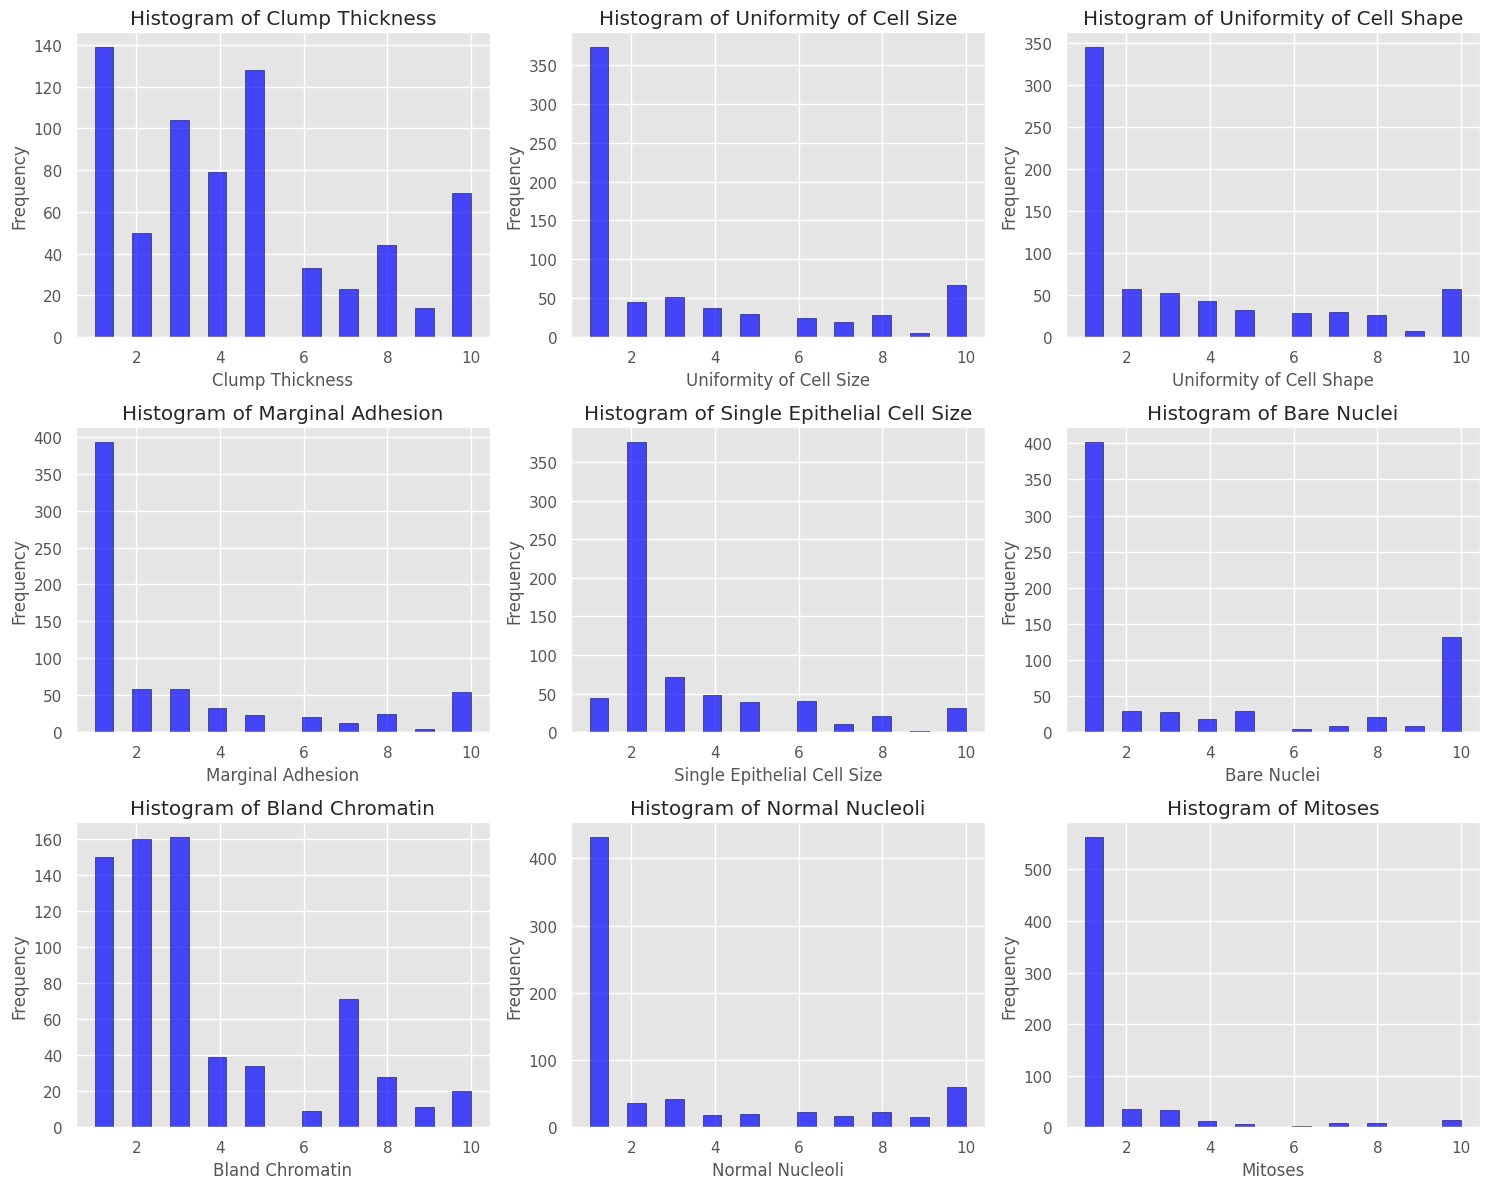

In [14]:
# Drop non-numeric columns for histogram visualization
numeric_columns = df.drop(columns=["Class"]).select_dtypes(include='number')

# Plot histograms for each numeric column
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(numeric_columns.columns):
    ax = axes[i]
    numeric_columns[col].plot.hist(ax=ax, bins=20, alpha=0.7, color='blue', edgecolor='black')
    ax.set_title(f'Histogram of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


In [15]:
# As we can see, last column is so much skewed. This will lead to a bad prediction, So, we drop those columns
df = df.drop("Mitoses", axis=1)

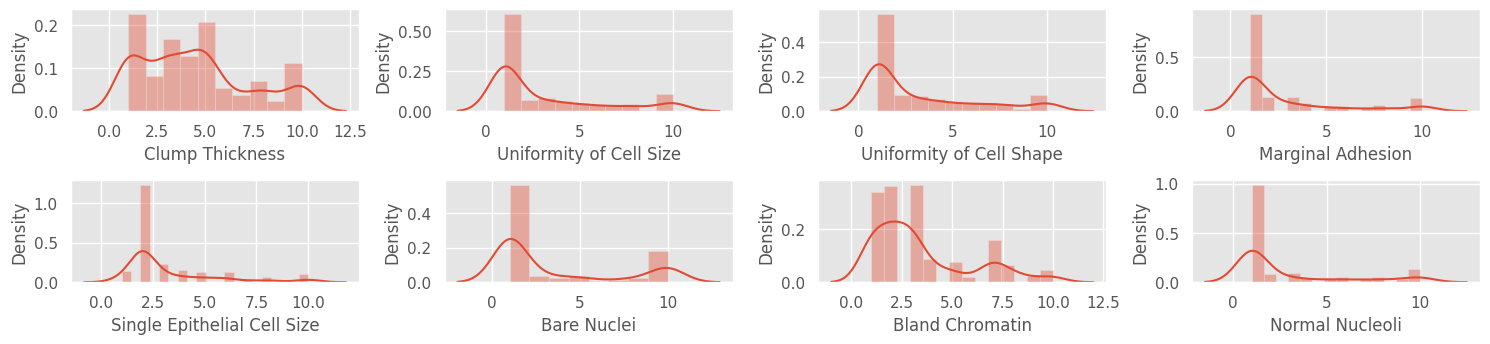

In [16]:
features = df.drop(['Class'], axis=1).columns
plt.figure(figsize=(15, 15))
for i, feature in enumerate(features):
    plt.subplot(9, 4, i+1)
    sns.distplot(df[feature])
plt.tight_layout()
plt.show()

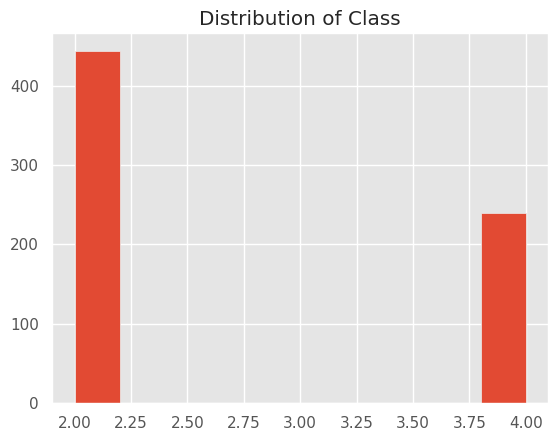

In [17]:
# To check the distribution of the target variable
plt.hist(df['Class'])
plt.title('Distribution of Class')
plt.show()

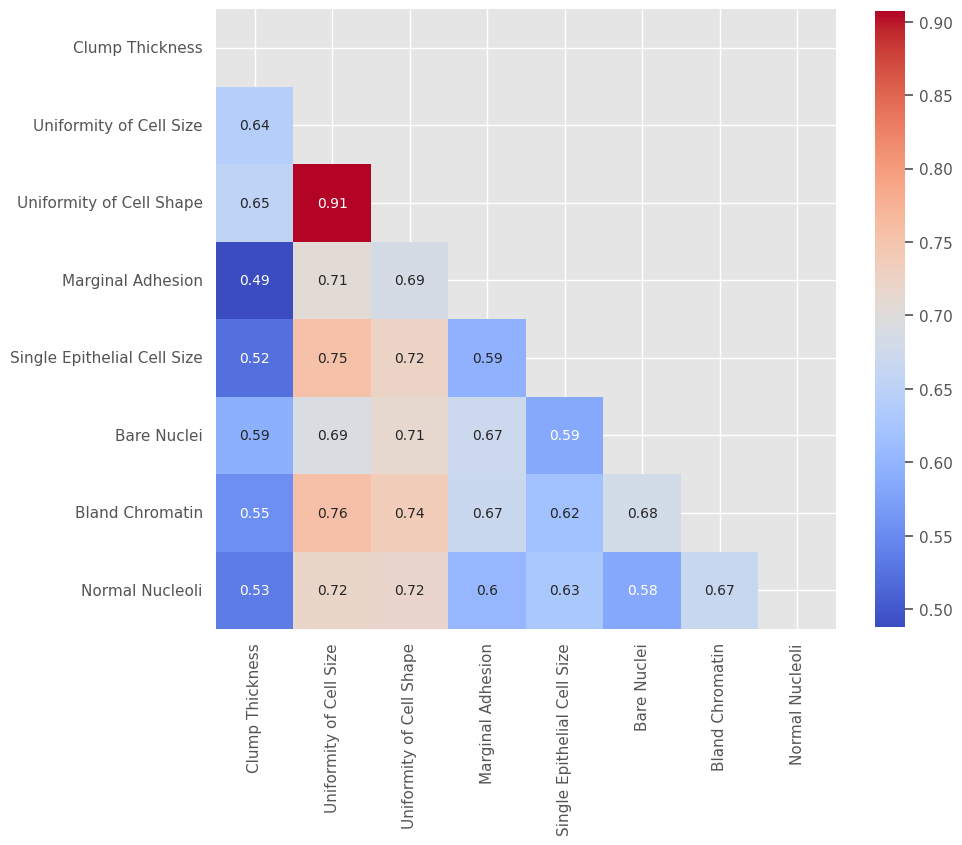

In [18]:
features = df.drop(['Class'], axis=1)

# Compute the correlation matrix
corr = features.corr()

# Mask the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Visualize the correlation matrix with the mask applied
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', mask=mask, square=True, cbar_kws={"shrink": 0.8})
plt.show()


## Data Preprocessing

In [19]:
# Remove "Uniformity of Cell Shape" column
df = df.drop("Uniformity of Cell Shape", axis=1)

# Obtain the features and the target variable
X = df.drop(['Class'], axis=1)
y = df['Class']

# Replace 2s with 0 and 4s with 1 in Y
y = y.replace({2: 0, 4: 1})

In [20]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Frature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Training with Logistic Regression

In [22]:
# Traning
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [23]:
# Prediciton using LR model
y_pred = lr.predict(X_test)
y_pred

array([1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1.,
       0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0.,
       1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0.,
       0.])

In [24]:
# Validation
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    roc_auc_score
)

# Validation function with ROC curve and confusion matrix visualization
def validate_model(model, X_test, y_test, y_pred, model_name="Model"):
    # Basic metrics
    accuracy = accuracy_score(y_test, y_pred)
    print(f"--- {model_name} Validation ---")
    print("Accuracy: ", accuracy)
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", cm)

    # Confusion Matrix Visualization
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=set(y_test), yticklabels=set(y_test))
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # ROC Curve (for binary classification)
    if len(set(y_test)) == 2:
        y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability scores for the positive class
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        auc_score = roc_auc_score(y_test, y_pred_proba)
        print(f"ROC AUC Score: {auc_score:.2f}")

        # Plot ROC Curve
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})", color="blue")
        plt.plot([0, 1], [0, 1], "r--", label="Random Guess")
        plt.title(f"{model_name} ROC Curve")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.legend()
        plt.grid()
        plt.show()
    else:
        print("ROC curve is only applicable for binary classification.\n")

--- Logistic Regression Validation ---
Accuracy:  0.9562043795620438
Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.99      0.96        79
         1.0       0.98      0.91      0.95        58

    accuracy                           0.96       137
   macro avg       0.96      0.95      0.95       137
weighted avg       0.96      0.96      0.96       137

Confusion Matrix:
 [[78  1]
 [ 5 53]]


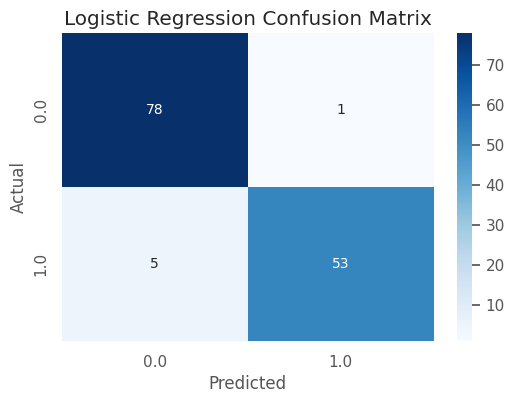

ROC AUC Score: 1.00


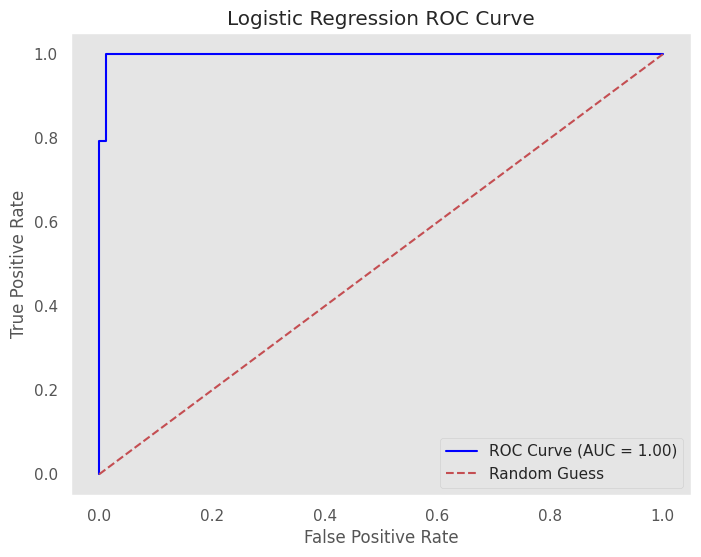

In [25]:
# Validation
model_name = "Logistic Regression"
validate_model(lr, X_test, y_test, y_pred, model_name=model_name)

## Training with KNN Model

In [26]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [27]:
# Prediction using KNN model
y_pred = knn.predict(X_test)
y_pred

array([1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1.,
       0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0.,
       1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       0.])

--- KNN Validation ---
Accuracy:  0.9562043795620438
Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.99      0.96        79
         1.0       0.98      0.91      0.95        58

    accuracy                           0.96       137
   macro avg       0.96      0.95      0.95       137
weighted avg       0.96      0.96      0.96       137

Confusion Matrix:
 [[78  1]
 [ 5 53]]


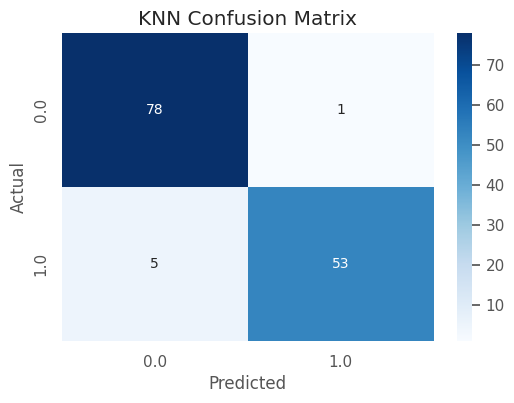

ROC AUC Score: 1.00


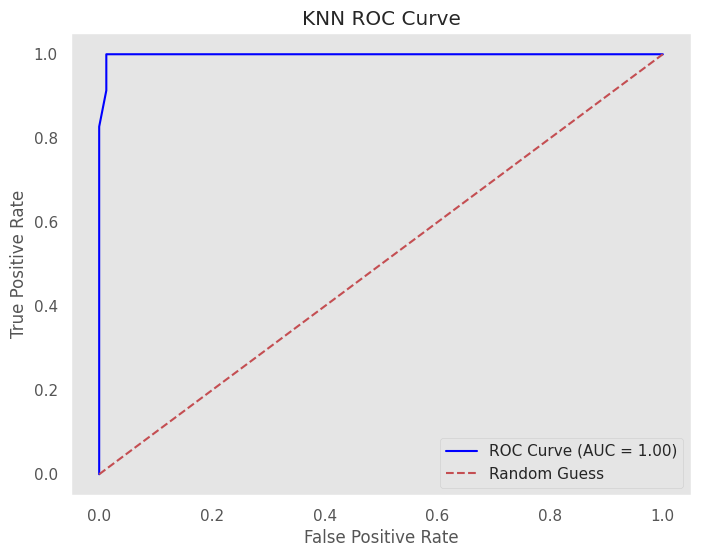

In [28]:
# Validation
model_name = "KNN"
validate_model(knn, X_test, y_test, y_pred, model_name=model_name)

## Training with Decision Trees

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier()
parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'max_features': ['auto', 'sqrt', 'log2'],
    'splitter': ['best', 'random'],
}
clf = GridSearchCV(dt, parameters, cv=5)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'splitter': ['best', 'random']})

In [30]:
# Best parameters
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'max_features': 'log2',
 'min_samples_leaf': 7,
 'min_samples_split': 6,
 'splitter': 'best'}

In [31]:
# Prediction using decision trees
y_pred = clf.predict(X_test)
y_pred

array([1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1.,
       0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0.,
       1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       0.])

--- Decision Trees Validation ---
Accuracy:  0.948905109489051
Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.97      0.96        79
         1.0       0.96      0.91      0.94        58

    accuracy                           0.95       137
   macro avg       0.95      0.94      0.95       137
weighted avg       0.95      0.95      0.95       137

Confusion Matrix:
 [[77  2]
 [ 5 53]]


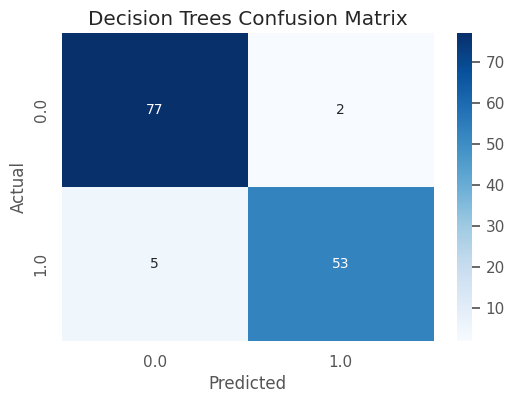

ROC AUC Score: 0.99


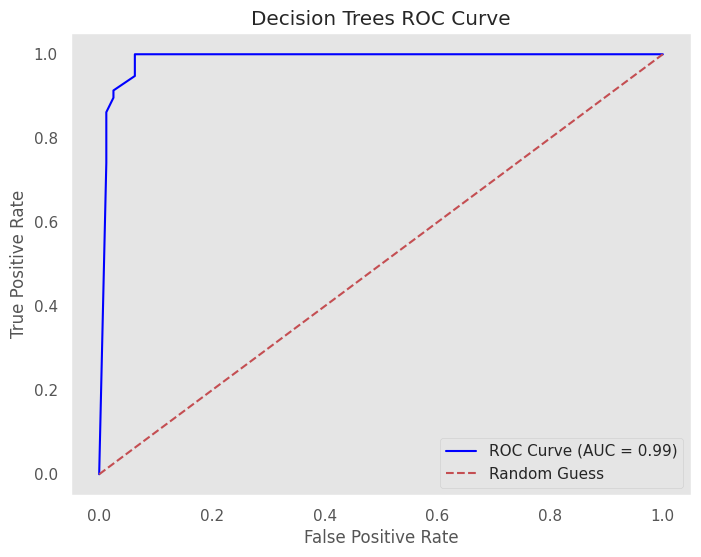

In [32]:
# Validation
model_name = "Decision Trees"
validate_model(clf, X_test, y_test, y_pred, model_name=model_name)

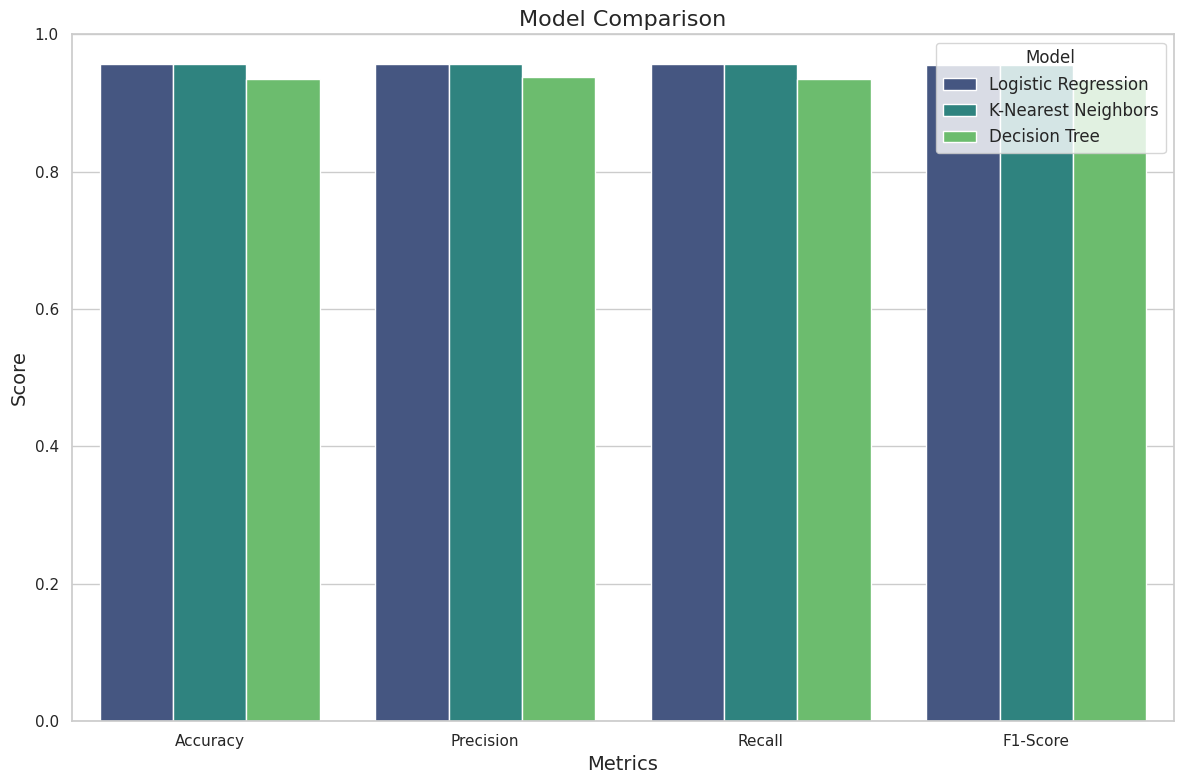

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Function to evaluate a model and return metrics
def get_metrics(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    return {
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }

# Initialize models
lr = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=5)
dt = DecisionTreeClassifier(max_depth=5, criterion='entropy', min_samples_split=3, min_samples_leaf=2)

# Get metrics for each model
metrics = []
metrics.append(get_metrics(lr, X_train, X_test, y_train, y_test, 'Logistic Regression'))
metrics.append(get_metrics(knn, X_train, X_test, y_train, y_test, 'K-Nearest Neighbors'))
metrics.append(get_metrics(dt, X_train, X_test, y_train, y_test, 'Decision Tree'))

# Convert metrics to a DataFrame for easier plotting
import pandas as pd
metrics_df = pd.DataFrame(metrics)

# Plotting
plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")

# Melt the DataFrame for grouped bar plot
metrics_melted = metrics_df.melt(id_vars='Model', var_name='Metric', value_name='Value')

# Create grouped bar plot
sns.barplot(data=metrics_melted, x='Metric', y='Value', hue='Model', palette='viridis')

# Customize the plot
plt.title('Model Comparison', fontsize=16)
plt.ylabel('Score', fontsize=14)
plt.xlabel('Metrics', fontsize=14)
plt.ylim(0, 1)
plt.legend(title='Model', fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()